# Clasificación multiclase con redes neuronales en Keras
___

In [1]:
# Imports
#try:
#  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Google drive session
from google.colab import drive
drive.mount('/content/gdrive')

## Importar Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Explorar el dataset

#### Conjunto de entrenamiento

In [9]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train_full.shape

(60000,)

In [19]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Conjunto de prueba

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

#### Visualizando una instancia

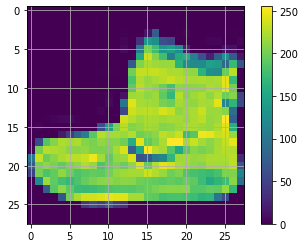

In [24]:
plt.figure()
plt.imshow(X_train_full[0])
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [27]:
y_train_full[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
class_names[y_train_full[1]]

'T-shirt/top'

#### Visualizando las primeras 25 instancias

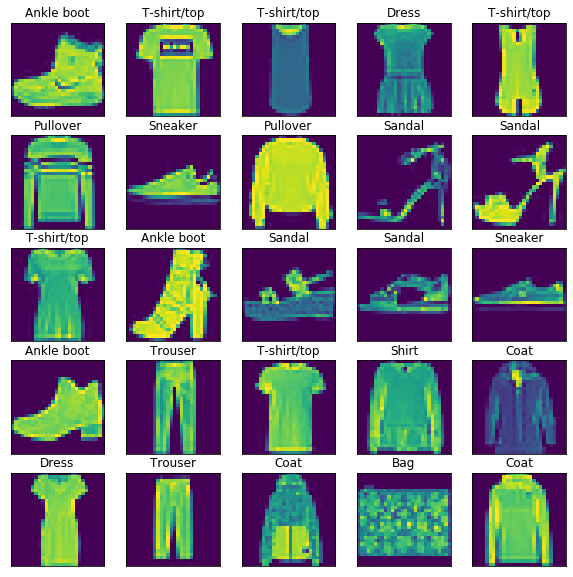

In [25]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i])
    #plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [29]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [30]:
X_train_full = X_train_full / 255. # <-- ¿qué divisor?
X_test = X_test / 255.# <-- ¿qué divisor?

In [34]:
X_train_full.dtype

dtype('float64')

In [35]:
X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [37]:
# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [38]:
X_validation.shape

(5000, 28, 28)

In [39]:
X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [40]:
model = tf.keras.models.Sequential([# Sequential implementacion mas sencilla en keras
   tf.keras.layers.Flatten(input_shape=[28,28], name='flatten_layer'), #<--¿input_shape? # Output shape 784
   tf.keras.layers.Dense(units=64, activation="sigmoid", name='hidden1'),      # 64 es deacuerdo al problema
   #tf.keras.layers.Dense(units=10, activation="softmax", name='output_layer'),   
   tf.keras.layers.Dense(units=10, name='output_layer') # <-- ¿units?                   
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 64)                50240     
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


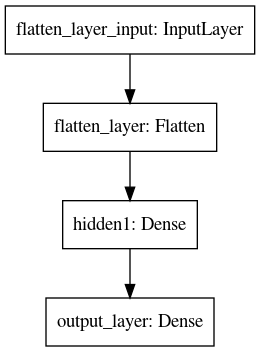

In [42]:
tf.keras.utils.plot_model(model)

In [43]:
model.layers

#### Analizando W y b ¿Cómo se inicializan los W y b?

In [44]:
weights, biases = model.get_layer('hidden1').get_weights()
# weights, biases = model.layers[1].get_weights()

In [45]:
weights.shape

(784, 64)

In [46]:
weights

array([[-0.01628179, -0.03521243,  0.00872126, ...,  0.02172022,
         0.06109066,  0.08248674],
       [ 0.02455946, -0.0048846 , -0.05884899, ...,  0.00874093,
         0.01216641,  0.0635452 ],
       [-0.00050358,  0.0540847 , -0.02005479, ...,  0.02984941,
        -0.01107012,  0.01632198],
       ...,
       [ 0.01516556, -0.06598948,  0.02973594, ..., -0.03012307,
         0.00840307, -0.06388214],
       [-0.06451878,  0.05152274, -0.03971441, ..., -0.00042358,
         0.03995451, -0.00609497],
       [-0.05447469, -0.07312553, -0.08237363, ...,  0.01240314,
         0.02466984,  0.02548698]], dtype=float32)

In [47]:
biases.shape

(64,)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [49]:
batch_data = X_train[:1]
pred = model(batch_data).numpy()
print(pred)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[-0.86635816 -1.311097    0.9962032  -0.27280664 -0.09090866 -0.94314325
   1.0193467  -1.3076755  -1.1417637   0.63270795]]


In [50]:
print(tf.nn.softmax(pred).numpy())

[[0.03927695 0.02517619 0.25295186 0.07110725 0.08529257 0.03637395
  0.25887433 0.02526249 0.02982158 0.17586276]]


# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [51]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)#Sparse cuando etiquetas son digitos, cuando tenemos matrices con 1 para identificar la clase, quitamos el Sparse
model.compile(loss=loss_fn, #1
              optimizer='adam', #2
              metrics=['accuracy']) #3 (al ser clasificacion nos sirve saber cuantas instancias esta clasificando bien 'accuracy')

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay -> 

In [52]:
# Si quieres usar el conjunto de validación hecho por ti
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_validation,y_validation))


# Si quieres que Keras cree el conjunto de validación
#history = model.fit(X_train_full,
                    #y_train_full,
                    #epochs=10,
                    #batch_size=32,
                    #validation_split=0.1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 69us/sample - loss: 0.6186 - accuracy: 0.7991 - val_loss: 0.4362 - val_accuracy: 0.8442
Epoch 2/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4107 - accuracy: 0.8539 - val_loss: 0.3891 - val_accuracy: 0.8532
Epoch 3/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3720 - accuracy: 0.8671 - val_loss: 0.3595 - val_accuracy: 0.8688
Epoch 4/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3480 - accuracy: 0.8752 - val_loss: 0.3613 - val_accuracy: 0.8630
Epoch 5/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3323 - accuracy: 0.8796 - val_loss: 0.3437 - val_accuracy: 0.8732
Epoch 6/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.3391 - val_accuracy: 0.8698
Epoch 7/30
55000/55000 [==============================] -

Como saber si fueron suficientes epocas????

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [53]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [54]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [55]:
history.history

{'loss': [0.6186267890670083,
  0.41068412330800835,
  0.37197575981616976,
  0.34799686027873644,
  0.33234741650277916,
  0.3157361771713604,
  0.30505087926387786,
  0.29580305334221235,
  0.28602077579064805,
  0.27634343768033115,
  0.26990503882169725,
  0.263372255571322,
  0.2571604250907898,
  0.2497500198895281,
  0.24469161672700535,
  0.23779801806536588,
  0.23388451297716661,
  0.2293283829645677,
  0.2230233166629618,
  0.21855444778854197,
  0.2152849444898692,
  0.21072041507200762,
  0.20657468954324723,
  0.20390100454417143,
  0.19849239920919592,
  0.19658494120294398,
  0.1937391390583732,
  0.19002777350382372,
  0.18608560578931463,
  0.18371023694249716],
 'accuracy': [0.7990909,
  0.85385454,
  0.8671091,
  0.87521815,
  0.8796,
  0.88565457,
  0.88934547,
  0.89321816,
  0.8950545,
  0.8986,
  0.902,
  0.9038182,
  0.90647274,
  0.9094727,
  0.9109091,
  0.9130909,
  0.9147636,
  0.91574544,
  0.91801816,
  0.9202545,
  0.9213273,
  0.9227091,
  0.92456365,
 

#### Curvas de aprendizaje

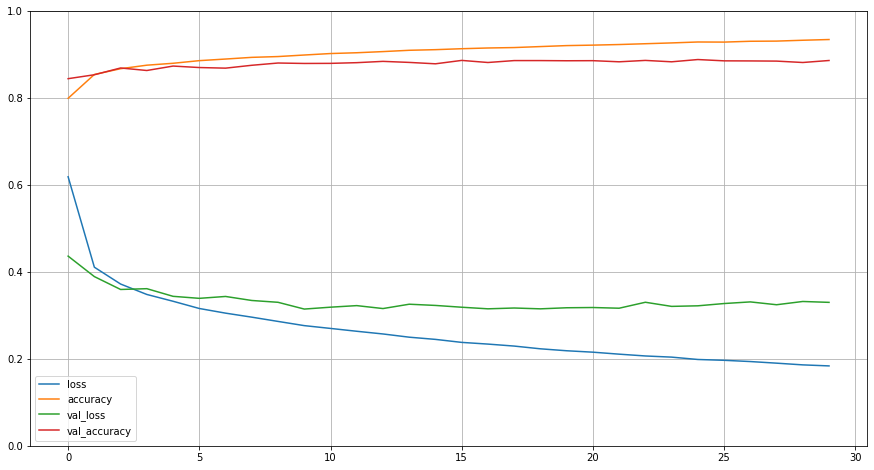

In [56]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [57]:
#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     y_train,
                     epochs=60,
                     batch_size=32,
                     validation_data=(X_validation,y_validation),
                     initial_epoch=30)

#Si quisiéramos seguir entrenando usando el conjunto de validación creado por Keras
#history2 = model.fit(X_train_full,
                     #y_train_full,
                     #epochs=90,
                     #batch_size=32,
                     #validation_split=0.1, 
                     #initial_epoch=10)

Train on 55000 samples, validate on 5000 samples
Epoch 31/60
55000/55000 [==============================] - 3s 55us/sample - loss: 0.1808 - accuracy: 0.9356 - val_loss: 0.3350 - val_accuracy: 0.8852
Epoch 32/60
55000/55000 [==============================] - 3s 56us/sample - loss: 0.1782 - accuracy: 0.9356 - val_loss: 0.3398 - val_accuracy: 0.8828
Epoch 33/60
55000/55000 [==============================] - 3s 56us/sample - loss: 0.1750 - accuracy: 0.9368 - val_loss: 0.3288 - val_accuracy: 0.8870
Epoch 34/60
55000/55000 [==============================] - 3s 57us/sample - loss: 0.1733 - accuracy: 0.9384 - val_loss: 0.3335 - val_accuracy: 0.8836
Epoch 35/60
55000/55000 [==============================] - 3s 56us/sample - loss: 0.1698 - accuracy: 0.9393 - val_loss: 0.3485 - val_accuracy: 0.8860
Epoch 36/60
55000/55000 [==============================] - 3s 55us/sample - loss: 0.1673 - accuracy: 0.9396 - val_loss: 0.3391 - val_accuracy: 0.8874
Epoch 37/60
55000/55000 [==========================

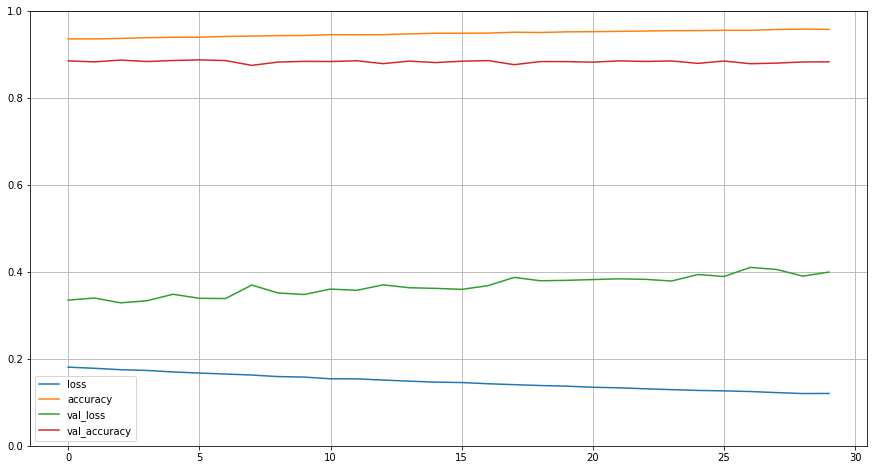

In [59]:
#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()# Si empieza a subir el valor en el test, hay overfiting

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [60]:
loss_and_metrics = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.4087 - accuracy: 0.8789


# Predicción en nuevos datos

In [61]:
X_new = X_test[:5]

#### Salidas del modelo entrenado

In [62]:
model_output = model.predict(X_new).round(2)
model_output

array([[ -9.78, -14.02,  -5.77, -11.09, -10.9 ,  -6.67, -10.4 ,  -1.66,
         -7.96,   7.32],
       [ -3.5 , -13.34,   4.29, -16.37,   0.98, -12.37,  -0.04, -23.26,
        -14.75, -23.8 ],
       [ -0.85,  11.26,  -5.93,  -3.36,  -9.01, -19.08,  -6.05, -13.17,
         -9.11, -12.23],
       [ -4.17,   9.97,  -7.17,  -2.87,  -9.23, -19.26,  -5.64, -17.56,
        -10.44, -14.39],
       [  2.42, -16.95,   0.31,  -4.1 ,  -2.41, -17.97,   4.43, -23.59,
         -5.52, -12.78]], dtype=float32)

#### Probabilidad estimada por clase

In [63]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) # ****

predictions = probability_model.predict(X_new) # nos da la distribucion de probabilidad
predictions = probability_model.predict(X_new)
print(predictions)

[[3.76916880e-08 5.40149037e-10 2.07254220e-06 1.01049924e-08
  1.23112871e-08 8.46751050e-07 2.02629504e-08 1.26371466e-04
  2.32222064e-07 9.99870420e-01]
 [3.92385322e-04 2.08827462e-08 9.52381849e-01 1.01146347e-09
  3.47631089e-02 5.53215571e-08 1.24624968e-02 1.03158248e-12
  5.12359222e-09 6.02250617e-13]
 [5.54874623e-06 9.99993920e-01 3.42905224e-08 4.49670296e-07
  1.58181535e-09 6.70118800e-14 3.04493319e-08 2.47679412e-11
  1.42766177e-09 6.28511479e-11]
 [7.19429352e-07 9.99996424e-01 3.60093217e-08 2.64166874e-06
  4.56429561e-09 2.00601295e-13 1.66338140e-07 1.10786835e-12
  1.36894007e-09 2.62346273e-11]
 [1.16186574e-01 4.52722415e-10 1.40890153e-02 1.71353779e-04
  9.30451264e-04 1.63215705e-10 8.68580878e-01 5.92170247e-13
  4.17073243e-05 2.91646050e-08]]


#### Clase con mayor probabilidad

In [64]:
predictions = probability_model.predict_classes(X_new)
print(predictions)

[9 2 1 1 6]


In [65]:
np.array(class_names)[predictions]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [66]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

# Guardar y restaurar el modelo

#### Guardar modelo

In [69]:
# Para ya tener nuestro modelo
# Escribe el path donde quieres que se guarde
#path = "/content/gdrive/My Drive/keras_fashion2020.h5" # <--path
patho = "keras_fashion2020.h5" # Seguarda en la carpeta
model.save(path) #En formato HDF5

#### Restaurar un modelo

In [70]:
model = tf.keras.models.load_model(patho)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 64)                50240     
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [71]:
X_new = X_test[:5] # pretend these are new instances
y_pred = probability_model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6])